# ANLP 2019 - Assignment 4


*Kalogianni Ioanna, 5000659597* (enter your name/student id number here)

<div class="alert alert-block alert-danger">Due: Wednesday, December 18, 4pm</div>

<div class="alert alert-block alert-info">
**NOTE**<br><br>

Please first fill in your name and id number at the top of the assignment, and **rename** the assignment file to **yourlastname-anlp-4.ipynb**<br><br>
Problems and questions are given in blue boxes like this one. All grey and white boxes must be filled by you (they either require code or a (brief!) discussion). <br><br>
Please hand in your assignment by the deadline via Moodle. In case of questions, you can contact the TAs or David via the usual channels.
</div>

<div class="alert alert-block alert-info">
In this assignment, you will implement a feedforward neural network and train it with backpropagation to classify intent from the provided dataset (<https://github.com/Dark-Sied/Intent_Classification>). For the purpose of understanding the learning process, the whole dataset is used as both training and test data. (What does that mean for your results?)<br><br>

You should implement all part of this exercise using only python + standard library + NumPy. (That is, no specialised machine learning libraries are allowed.) Here is a list of NumPy functions that may or may not be useful for this task: <br>
`np.array(), np.eye(), np.reshape(), np.ones(), np.zeros(), np.dot(), np.concatenate(), np.maximum(), np.argmax(), np.sum(), np.uniform()`. <br><br>

A more comprehensive introduction to NumPy can be found here: <https://sites.engineering.ucsb.edu/~shell/che210d/numpy.pdf> .

</div>

In [67]:
# For your convenience, a function for reading in the dataset:
import csv

def load_dataset(filename):
    intent = []
    unique_intent = []
    sentences = []
    with open(filename, "r", encoding="latin1") as f:
        data = csv.reader(f, delimiter=",")
        for row in data:
            sentences.append(row[0])
            intent.append(row[1])
    unique_intent = set(intent)
    return sentences, intent, unique_intent
            
sentences, intent, unique_intent = load_dataset("dataset.csv")

In [81]:
data = load_dataset("dataset.csv")

## Problem 1: Bag-of-Words Representation

<div class="alert alert-block alert-info">
The first thing you're being asked to do is to convert the text into a bag-of-words representation matrix where the dimension of the matrix is $V$ x $M$ ($M$: number of examples, $V$: vocabulary size) and the label to a matrix of dimension $K$ x $M$ where $K$ is number of classes.   
<div>

In [209]:
# Student solution here.
import nltk  
import numpy as np  
import random  
import string

import bs4 as bs  
import urllib.request  
import re 
import math 
from matplotlib import pylab
import pylab as plt
import numpy as np

In [210]:
lower_case_sentences = []
for i in sentences:
    lower_case_sentences.append(i.lower())

In [211]:
sans_punctuation_sentences = []
import string

for i in lower_case_sentences:
    sans_punctuation_sentences.append(''.join(c for c in i if c not in string.punctuation))

In [212]:
preprocessed_sentences = []
for i in sans_punctuation_sentences:
    preprocessed_sentences.append(i.split(' '))

In [213]:
sentence_vectors = []
for sentence in sans_punctuation_sentences:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)


In [214]:
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

In [215]:
sentence_vectors = np.asarray(sentence_vectors)

In [216]:
import pandas as pd
frequency_matrix = pd.DataFrame(sentence_vectors,index=sentences)
frequency_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Need help pleese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Need help,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I need some info,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Will you help me?,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
What else can you do?,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
borrowed amount can be used for which of the purposes?,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
borrowed amount given can used by me for what reasons?,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
borrowed amount given can used by me for which purposes?,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
borrowed money can be used for which of the purposes?,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Problem 2: Activation Function

<div class="alert alert-block alert-info">
For the classification task, the softmax activation function for the output layer with K classes is given by: 
$softmax(z_i) = \frac{e^{z_i}}{{\sum_{j=1}^{K}e^{z_j}}}$ <br>
The activation function of the hidden neurons is a non-linear function. We have seen tanh being used in class, but more common these days are for example ReLU or sigmoid, given by: <br>
$ReLU(z)=max(0,z)$ <br>
$sigmoid(z)=\frac{1}{1+e^{-z}}$ <br>

Implement the softmax, ReLU, and sigmoid activation function in such a way that it accepts NumPy array and matrices. Plot the ReLU and sigmoid functions, as well as their derivatives. Observe the plot and discuss briefly what the advantages and disadvantages of the ReLU and sigmoid activation function might be. 
<div>

### Softmax activation function

In [217]:
def softmax(x, axis=None):
    x = x - x.max(axis=axis, keepdims=True)
    y = np.exp(x)
    softmax = y / y.sum(axis=axis, keepdims=True)
    return softmax

In [218]:
def softmax_grad(s): 

    jacobian_m = np.diag(s)

    for i in range(len(jacobian_m)):
        for j in range(len(jacobian_m)):
            if i == j:
                jacobian_m[i][j] = s[i] * (1-s[i])
            else: 
                jacobian_m[i][j] = -s[i]*s[j]
    return jacobian_m

No handles with labels found to put in legend.


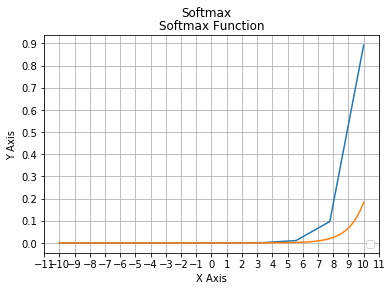

In [219]:
mySamples = []
mySigmoid = []

x = plt.linspace(-10,10,10)
y = plt.linspace(-10,10,100)

plt.plot(x, softmax(x))
plt.plot(y, softmax(y))

plt.grid()

plt.title('Softmax Function')
plt.suptitle('Softmax')

plt.legend(loc='lower right')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
 
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.show()

mySamples = []
mySigmoid = []

x = plt.linspace(-10,10,10)
y = plt.linspace(-10,10,100)

plt.plot(x, softmax_grad(x))
plt.plot(y, softmax_grad(y))

plt.grid()

plt.title('Softmax Function')
plt.suptitle('Softmax')

plt.legend(loc='lower right')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
 
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.show()

### ReLu activation function

In [220]:
def ReLU(x):
    return abs(x) * (x > 0)

def d_relu(z):
    z[z>0]=1
    z[z<=0]=0
    return z

No handles with labels found to put in legend.


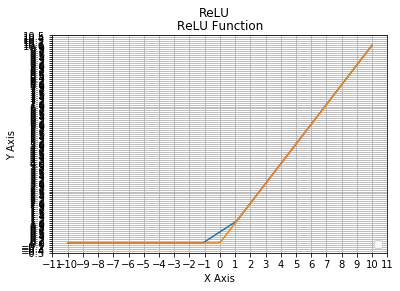

In [221]:
mySamples = []
mySigmoid = []

x = plt.linspace(-10,10,10)
y = plt.linspace(-10,10,100)

plt.plot(x, ReLU(x))
plt.plot(y, ReLU(y))

plt.grid()

plt.title('ReLU Function')
plt.suptitle('ReLU')

plt.legend(loc='lower right')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
 
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.show()

No handles with labels found to put in legend.


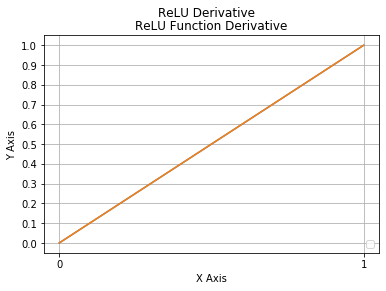

In [222]:
plt.plot(x, d_relu(x))
plt.plot(y, d_relu(y))

plt.grid()

plt.title('ReLU Function Derivative')
plt.suptitle('ReLU Derivative')

plt.legend(loc='lower right')


plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
 
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.show()

### Sigmoid activation function

In [223]:
def sigmoid(x):
    
  return 1 / (1 + math.exp(-x))

sigmoid_v = np.vectorize(sigmoid)

In [224]:
from scipy.special import expit as sigmoid
def sigmoid_grad(x):
    fx = sigmoid_v(x)
    return fx * (1 - fx)

No handles with labels found to put in legend.


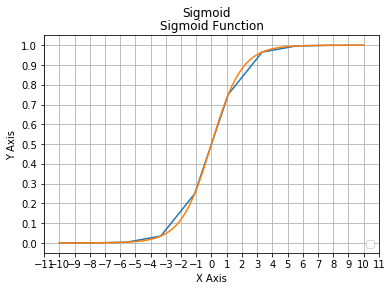

In [225]:
mySamples = []
mySigmoid = []

x = plt.linspace(-10,10,10)
y = plt.linspace(-10,10,100)

plt.plot(x, sigmoid_v(x))
plt.plot(y, sigmoid_v(y))

plt.grid()

plt.title('Sigmoid Function')
plt.suptitle('Sigmoid')

plt.legend(loc='lower right')


plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.show()

No handles with labels found to put in legend.


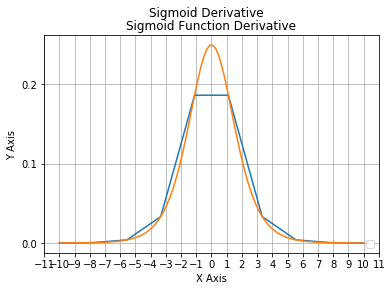

In [226]:
mySamples = []
mySigmoid = []

x = plt.linspace(-10,10,10)
y = plt.linspace(-10,10,100)

plt.plot(x, sigmoid_grad(x))
plt.plot(y, sigmoid_grad(y))

plt.grid()

plt.title('Sigmoid Function Derivative')
plt.suptitle('Sigmoid Derivative')

plt.legend(loc='lower right')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.show()

## Problem 3: Feedforward Neural Network

<div class="alert alert-block alert-info">
Now that you have created the input matrix, we can implement our neural network and perform a forward propagation to classify intent. To perform the forward propagation, you should compute $z^{l}$ and pass it through the activation function for each layer, given by: <br><br>
$z^{l} = W^{l}a^{l-1} + b^{l}$ <br>
$a^{l} = g(z^{l})$ <br>
where $W^{l}$ is a weight matrix between layer $l$ and $l+1$, $z^{l}$ is value of the hidden layer at layer $l$ before activation, $a^{l}$ is value of the hidden layer at layer $l$ after activation, and $b^{l}$ is bias term for layer $l$.

You should implement the feedforward computation that computes $\hat{y_{i}}$ for every example $i$. The neural network has 3 layers - an input layer, a hidden layer and an output layer, where the hidden layer has 150 neurons. Don't forget to include the bias term. Use ReLU as the activation function for the hidden layer and softmax for the output layer. For parameters initialization, use random values from uniform distribution in the range (-1,1). Provide a seed value to the random number generator, to make the results reproducible. The purpose of using this kind of initialisation is to break symmetry and ensure that different neurons can learn different non-linear functions. (Hint: use vectorization methods instead of a for loop for speedup.) <br><br>

Use this neural network to predict the intent and calculate the accuracy of the classifier. (Should you be expecting high numbers yet?)
<div>

In [227]:
# Student solution here.

In [228]:
#HYPERPARAMETERS

#num of target labels
num_classes = len(np.unique(intent))

#define layer_neurons
input_units  = 890   #neurons in input layer
hidden_units = 150  #neurons in hidden layer
output_units = 21   #neurons in output layer

#define hyper-parameters
learning_rate = 0.03

#regularization parameter
beta = 0.00001

#num of iterations
iters = 4001

In [229]:
#PARAMETERS

#initialize parameters i.e weights
def initialize_parameters():
    #initial values should have zero mean and 0.1 standard deviation
    mean = 0        #mean of parameters 
    std = 0.03      #standard deviation
    
    layer1_weights = np.random.normal(mean,std,(input_units,hidden_units))          
    layer1_biases = np.ones((hidden_units,1))                                       
    layer2_weights = np.random.normal(mean,std,(hidden_units,output_units))
    layer2_biases = np.ones((output_units,1))
    
    parameters = dict()
    parameters['layer1_weights'] = layer1_weights
    parameters['layer1_biases'] = layer1_biases
    parameters['layer2_weights'] = layer2_weights
    parameters['layer2_biases'] = layer2_biases
    
    return parameters

In [230]:
#forward propagation
def forward_propagation(train_dataset,parameters):
    cache = dict()            
    m = len(train_dataset)    
    
    layer1_weights = parameters['layer1_weights']
    layer1_biases = parameters['layer1_biases']
    layer2_weights = parameters['layer2_weights']
    layer2_biases = parameters['layer2_biases']
    
    
    logits = np.dot(train_dataset,layer1_weights) + layer1_biases.T
    activation1 = np.array(ReLU(logits)).reshape(m,hidden_units)
    activation2 = np.array(np.matmul(activation1,layer2_weights) + layer2_biases.T).reshape(m,output_units)
    output = np.array(softmax(activation2)).reshape(m,num_classes)
    
   
    cache['output'] = output
    cache['activation1'] = activation1
    
    return cache,output

## Problem 4: Backpropagation

<div class="alert alert-block alert-info">
You will now implement the backpropagation algorithm to compute the gradient of the cost function with respect to the neural network weights' and bias term.  First of all, implement the cross entropy loss function to monitor if your model is actually learning. Remember that in backpropagation, we want to propagate the error signal to measure how much each neuron in the hidden layer contributes to the error in the output layer. It is more or less similar to forward propagation but in a reverse direction. For the output layer, set $\delta$ for cross entropy loss: <br><br>
$\delta^{L}= \hat{y} - y$ <br> where $L$ is the output layer and $\hat{y}$ is prediction of $y$. <br>

For the remaining hidden layer $l$, set: <br><br>
$\delta^{l} = (W^{l})^{T}\delta^{l+1} \odot g'(z^{l})$ <br> where $\odot$ is an element-wise product of matrices (Hadamard product), $g'$ is the derivative of the activation function. <br>

The derivative of the ReLU is given by:  $ReLU'(z) = \begin{cases} 1 & \text{if } z > 0 \\
                                                                                                                                      0 & \text{otherwise}.\end{cases}$<br>

By calculating the error term for each layer, you can then use the error term to calculate the partial derivatives $\frac{\partial \mathcal{L}}{\partial W^{l}} = \delta_{l+1} (a^{l})^{T}$ and $\frac{\partial \mathcal{L}}{\partial b^{l}} = \delta_{l+1}$ and perform batch gradient descent to update the parameter. (Batch gradient descent = run through all training instances and compute the gradient, then make the weight update.) Make sure that you accumulate the gradients for all the training samples and divide it by number of samples before doing the update. <br><br>

Here is some simple pseudocode to help with the training procedure: <br>
 * for number of epoch:
    > define gradient accumulator $\Delta w=0, \Delta b=0$ for each weight and bias term <br>
    > define cost accumulator $\Delta \mathcal{L}=0$ for the loss <br>
    
    > for each training example $i$:<br>
        >> perform forward propagation <br>
        >> calculate loss on example $i, L_{i}$ <br>
        >> $\Delta \mathcal{L} = \Delta \mathcal{L} + L_{i}$ <br> <br> 
        >> perform backpropagation <br>
        >> $\Delta w = \Delta w + \frac{\partial \mathcal{L}}{\partial W}$ for each weight <br>
        >> $\Delta b = \Delta b + \frac{\partial \mathcal{L}}{\partial b}$ for each bias term <br> 
        
    > calculate the cost, which is just average loss ($Cost = \frac{1}{m}\Delta \mathcal{L}$) <br>
    > $w = w - \frac{\alpha}{m}\Delta w$ for each weight <br>
    > $b = b - \frac{\alpha}{m}\Delta b$ for each bias term <br> 

Run the training for 1000 epoch using learning rate = 0.005 and use this neural network to predict the intent and calculate the accuracy of the classifier. (Hint: the dimension of $\delta^{l}$ should match the dimension of $a^{l}$, and the dimension of $\frac{\partial \mathcal{L}}{\partial W^{l}}$ and $\frac{\partial \mathcal{L}}{\partial b^{l}}$ should match the dimension of $W^{l}$ and $b^{l}$, respectively).<br><br>

Plot the cost function for each iteration and compare the results after training with results from Problem 3. Discuss what you observe!
<div>

In [231]:
#backward propagation
def backward_propagation(train_dataset,train_labels,parameters,cache):
    derivatives = dict()         #to store the derivatives
    
    #get stuff from cache
    output = cache['output']
    activation1 = cache['activation1']
    
    #get parameters
    layer1_weights = parameters['layer1_weights']
    layer2_weights = parameters['layer2_weights']
    
    #calculate errors
    error_output = output - train_labels
    error_activation1 = np.matmul(error_output,layer2_weights.T)
    error_activation1 = np.multiply(error_activation1,activation1)
    error_activation1 = np.multiply(error_activation1,1-activation1)
    
    
    #calculate partial derivatives
    partial_derivatives2 = np.matmul(activation1.T,error_output)/len(train_dataset)
    partial_derivatives1 = np.matmul(train_dataset.T,error_activation1)/len(train_dataset)
    
    #store the derivatives
    derivatives['partial_derivatives1'] = partial_derivatives1
    derivatives['partial_derivatives2'] = partial_derivatives2
    
    return derivatives

In [232]:
#update the parameters
def update_parameters(derivatives,parameters):
    #get the parameters
    layer1_weights = parameters['layer1_weights']
    layer2_weights = parameters['layer2_weights']
    
    #get the derivatives
    partial_derivatives1 = derivatives['partial_derivatives1']
    partial_derivatives2 = derivatives['partial_derivatives2']
    
    #update the derivatives
    layer1_weights -= (learning_rate*(partial_derivatives1 + beta*layer1_weights))
    layer2_weights -= (learning_rate*(partial_derivatives2 + beta*layer2_weights))
    
    #update the dict
    parameters['layer1_weights'] = layer1_weights
    parameters['layer2_weights'] = layer2_weights
    
    return parameters
    
#calculate the loss and accuracy
def cal_loss_accuray(train_labels,predictions,parameters):
    #get the parameters
    layer1_weights = parameters['layer1_weights']
    layer2_weights = parameters['layer2_weights']
    
    #cal loss and accuracy
    loss = -1*np.sum(np.multiply(np.log(predictions),train_labels) + np.multiply(np.log(1-predictions),(1-train_labels)))/len(train_labels) + np.sum(layer1_weights**2)*beta/len(train_labels) + np.sum(layer2_weights**2)*beta/len(train_labels)
    accuracy = np.sum(np.argmax(train_labels,axis=1)==np.argmax(predictions,axis=1))
    accuracy /= len(train_dataset)
    
    return loss,accuracy

### Train Function
1. Initialize Parameters
2. Forward Propagation
3. Backward Propagation
4. Calculate Loss and Accuracy
5. Update the parameters

Repeat the steps 2-5 for the given number of iterations

In [233]:

def train(train_dataset,train_labels,iters=2):
    J = []
  
    #WEIGHTS
    global layer1_weights
    global layer1_biases
    global layer2_weights
    global layer2_biases
  
    #initialize the parameters
    parameters = initialize_parameters()
    
    layer1_weights = parameters['layer1_weights']
    layer1_biases = parameters['layer1_biases']
    layer2_weights = parameters['layer2_weights']
    layer2_biases = parameters['layer2_biases']
    
    #to store final predictons after training
    final_output = []
    
    for j in range(iters):
        #forward propagation
        cache,output = forward_propagation(train_dataset,parameters)
        
        #backward propagation
        derivatives = backward_propagation(train_dataset,train_labels,parameters,cache)
        
        #calculate the loss and accuracy
        loss,accuracy = cal_loss_accuray(train_labels,output,parameters)
        
        #update the parameters
        parameters = update_parameters(derivatives,parameters)
        
        #append loss
        J.append(loss)
        
        #update final output
        final_output = output
        
        #print accuracy and loss
        if(j%500==0):
            print("Step %d"%j)
            print("Loss %f"%loss)
            print("Accuracy %f%%"%(accuracy*100))
    
    return J,final_output

### Prediction

In [234]:

# lets take 80% data as training and remaining 20% for test.
train_size = int(len(data) * .8)
test_size = int(len(data) * .2)
 
train_dataset = preprocessed_sentences[:train_size]
train_labels = intent[:train_size]

test_dataset = preprocessed_sentences[:test_size]
test_labels = intent[:test_size]

In [235]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
encoder.fit(train_intent)
train_labels = encoder.transform(train_intent)
test_labels = encoder.transform(test_intent)

In [236]:
J,final_output = train(train_sentences,train_intent,iters=4001)

ValueError: setting an array element with a sequence

### Plot the loss vs iteration graph

In [193]:
#plot loss graph
plt.plot(list(range(1,len(J))),J[1:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations VS Loss')
plt.show()

NameError: name 'J' is not defined

## Bonus: Mini-Batch and Stochastic Gradient Descent

<div class="alert alert-block alert-info">
As a bonus, train the neural network using mini-batch gradient descent with batch size = 64 and stochastic gradient descent (i.e., batch size = 1) for 1000 epoch using learning rate = 0.005. Plot the cost vs iteration for both cases and briefly discuss your observation!  
<div>